In [1]:
%cd ..

/home/bhkuser/bhklab/katy/readii_2_roqc


In [2]:
from pathlib import Path

import pandas as pd
import SimpleITK as sitk
from damply import dirs
from radiomics import featureextractor

In [2]:
settings = dirs.CONFIG / "pyradiomics" / "pyradiomics_original_single_feature.yaml" 
image = sitk.ReadImage(f"{dirs.PROCDATA}/TCIA_NSCLC-Radiomics_test/images/mit_NSCLC-Radiomics_test/LUNG1-001_0000/CT_63382046/CT.nii.gz")
mask = sitk.ReadImage(f"{dirs.PROCDATA}/TCIA_NSCLC-Radiomics_test/images/mit_NSCLC-Radiomics_test/LUNG1-001_0000/RTSTRUCT_35578236/GTV.nii.gz")

In [3]:
dataset_index = pd.read_csv(f"{dirs.PROCDATA}/TCIA_NSCLC-Radiomics_test/features/pyradiomics/pyradiomics_NSCLC-Radiomics_test_index.csv")

dataset_index['DataSource'] = "TCIA"

metadata = dataset_index.iloc[0]['DataSource']
metadata

'TCIA'

# Testing out functions

In [4]:
import sys; sys.path.append("../workflow/scripts")
from feature_extraction.extract import (
    compile_dataset_features,
    extract_dataset_features,
)

compile_dataset_features(dataset_index=dataset_index,
                          method="pyradiomics",
                          settings_name="pyradiomics_original_single_feature")

14:57:19 [warning  ] No samples found for image class original roi. Skipping. [readii] call=extract.compile_dataset_features:232
         [error    ] No non-empty dataframes found for shuffled non_roi. [readii] call=extract.compile_dataset_features:267
         [error    ] Empty file written to /home/bhkuser/bhklab/katy/readii_2_roqc/data/results/TCIA_NSCLC-Radiomics_test/features/pyradiomics/pyradiomics_original_single_feature/shuffled_non_roi_features.csv [readii] call=extract.compile_dataset_features:272
         [error    ] No non-empty dataframes found for shuffled full. [readii] call=extract.compile_dataset_features:267
         [error    ] Empty file written to /home/bhkuser/bhklab/katy/readii_2_roqc/data/results/TCIA_NSCLC-Radiomics_test/features/pyradiomics/pyradiomics_original_single_feature/shuffled_full_features.csv [readii] call=extract.compile_dataset_features:272
         [error    ] No non-empty dataframes found for shuffled roi. [readii] call=extract.compile_dataset_fe

{'randomized_non_roi': 0        SampleID                                              Image  \
 1  LUNG1-001_0000  readii_NSCLC-Radiomics_test/LUNG1-001_0000/CT_...   
 1  LUNG1-002_0001  readii_NSCLC-Radiomics_test/LUNG1-002_0001/CT_...   
 
 0                                               Mask           DatasetName  \
 1  mit_NSCLC-Radiomics_test/LUNG1-001_0000/RTSTRU...  NSCLC-Radiomics_test   
 1  mit_NSCLC-Radiomics_test/LUNG1-002_0001/RTSTRU...  NSCLC-Radiomics_test   
 
 0 SeriesInstanceUID_Image Modality_Image SeriesInstanceUID_Mask Modality_Mask  \
 1                     NaN             CT                    NaN      RTSTRUCT   
 1                     NaN             CT                    NaN      RTSTRUCT   
 
 0 MaskID readii_Permutation  ... diagnostics_Mask-interpolated_Size  \
 1    GTV         randomized  ...                     (108, 101, 75)   
 1    GTV         randomized  ...                     (110, 109, 90)   
 
 0 diagnostics_Mask-interpolated_BoundingBox  \
 1  

In [5]:
extract_dataset_features(dataset = "NSCLC-Radiomics_test",
        method = "pyradiomics",
        settings = "pyradiomics_original_single_feature.yaml",
        overwrite = True,
        parallel = True)

KeyboardInterrupt: 

In [9]:
from itertools import product

list(product(dataset_index['readii_Permutation'].unique(), dataset_index['readii_Region'].unique()))

[('original', 'full'),
 ('original', 'non_roi'),
 ('original', 'roi'),
 ('randomized', 'full'),
 ('randomized', 'non_roi'),
 ('randomized', 'roi'),
 ('sampled', 'full'),
 ('sampled', 'non_roi'),
 ('sampled', 'roi'),
 ('shuffled', 'full'),
 ('shuffled', 'non_roi'),
 ('shuffled', 'roi')]

# Development

In [14]:
# Convert settings Path to string for pyradiomics to read it
if isinstance(settings, Path):
    settings = str(settings)

try:
    # Set up PyRadiomics feature extractor with provided settings file (expects a string, not a pathlib Path)
    extractor = featureextractor.RadiomicsFeatureExtractor(settings)

    sample_feature_vector = extractor.execute(image, mask)

except Exception as e:
    print(f"Feature extraction failed for this sample: {e}")

In [5]:
metadata['Dataset'] = "NSCLC-Radiomics_test"
metadata

SampleID                                                      LUNG1-001_0000
Image                      mit_NSCLC-Radiomics_test/LUNG1-001_0000/CT_633...
Mask                       mit_NSCLC-Radiomics_test/LUNG1-001_0000/RTSTRU...
DatasetName                                             NSCLC-Radiomics_test
SeriesInstanceUID_Image    1.3.6.1.4.1.32722.99.99.2989917765213423750108...
Modality_Image                                                            CT
SeriesInstanceUID_Mask     1.3.6.1.4.1.32722.99.99.2279381215866080725084...
Modality_Mask                                                       RTSTRUCT
MaskID                                                                   GTV
readii_Permutation                                                  original
readii_Region                                                           full
Dataset                                                 NSCLC-Radiomics_test
Name: 0, dtype: object

In [15]:
from collections import OrderedDict

od_metadata = metadata.to_dict(into=OrderedDict)

In [9]:
features_dir_struct = Path(f"{dataset_index.iloc[0]['DataSource']}_{dataset_index.iloc[0]['DatasetName']}") / "features" / "pyradiomics" / "pyradiomics_original_single_feature"

# Set up path to the directory containing the sample feature files
sample_features_dir = dirs.PROCDATA / features_dir_struct

filelist = list(sample_features_dir.rglob("**/original_full_features.csv"))

pd.read_csv(filelist[0], index_col=0, header=None, sep=";").transpose()

,SampleID,Image,Mask,DatasetName,SeriesInstanceUID_Image,Modality_Image,SeriesInstanceUID_Mask,Modality_Mask,MaskID,readii_Permutation,...,diagnostics_Mask-interpolated_Size,diagnostics_Mask-interpolated_BoundingBox,diagnostics_Mask-interpolated_VoxelNum,diagnostics_Mask-interpolated_VolumeNum,diagnostics_Mask-interpolated_CenterOfMassIndex,diagnostics_Mask-interpolated_CenterOfMass,diagnostics_Mask-interpolated_Mean,diagnostics_Mask-interpolated_Minimum,diagnostics_Mask-interpolated_Maximum,original_shape_VoxelVolume
1,LUNG1-001_0000,mit_NSCLC-Radiomics_test/LUNG1-001_0000/CT_633...,mit_NSCLC-Radiomics_test/LUNG1-001_0000/RTSTRU...,NSCLC-Radiomics_test,1.3.6.1.4.1.32722.99.99.2989917765213423750108...,CT,1.3.6.1.4.1.32722.99.99.2279381215866080725084...,RTSTRUCT,GTV,original,...,"(108, 101, 75)","(6, 6, 7, 96, 89, 63)",160563,1,"(np.float64(54.732460155826686), np.float64(43...","(82.23246015582669, -201.5430858915192, -456.8...",-74.4041155185192,-1105.0,1081.0,160563.0


# Full negative controls overflow error debugging

In [3]:
mask = sitk.ReadImage("data/procdata/TCIA_RADCURE_GTVp_test/images/mit_RADCURE_GTVp_test/RADCURE-0006_0001/RTSTRUCT_97032605/ROI__[GTVp].nii.gz")

In [49]:
original_full_image = sitk.ReadImage("data/procdata/TCIA_RADCURE_window_test/images/mit_RADCURE_window_test/RADCURE-0007_0002/CT_31707248/CT.nii.gz")
print(original_full_image.GetSize())
print(original_full_image.GetSpacing())
print(original_full_image.GetOrigin())
print(original_full_image.GetDirection())

(512, 512, 172)
(0.9760000109672546, 0.9760000109672546, 2.0)
(-249.51100158691406, -249.51170349121094, -1144.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [50]:
randomized_full_image = sitk.ReadImage("data/procdata/TCIA_RADCURE_window_test/images/readii_RADCURE_window_test/original_512_512_n/RADCURE-0007_0002/CT_31707248/RTSTRUCT_66751618/ROI__[GTVp]/CT_randomized_full.nii.gz")
print(randomized_full_image.GetSize())
print(randomized_full_image.GetSpacing())
print(randomized_full_image.GetOrigin())
print(randomized_full_image.GetDirection())

(512, 512, 172)
(0.9760000109672546, 0.9760000109672546, 2.0)
(-249.51100158691406, -249.51170349121094, -1144.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [51]:
orig_full_arr = sitk.GetArrayFromImage(original_full_image)
rand_full_arr = sitk.GetArrayFromImage(randomized_full_image)

import numpy as np
print("Original")
print(f"Max: {np.max(orig_full_arr)}")
print(f"Min: {np.min(orig_full_arr)}")

print("Randomized")
print(f"Max: {np.max(rand_full_arr)}")
print(f"Min: {np.min(rand_full_arr)}")

Original
Max: 20000
Min: -3000
Randomized
Max: 20000
Min: -3000


In [53]:
rif = sitk.ResampleImageFilter()
rif.SetOutputSpacing([1,1,1])
rif.SetOutputDirection(original_full_image.GetDirection())
rif.SetSize([44, 43, 73])

rif.SetInterpolator(sitk.sitkBSpline)
resampled_orig_full_image = rif.Execute(original_full_image)
resampled_rand_full_image = rif.Execute(randomized_full_image)

In [55]:
sitk.GetArrayFromImage(resampled_rand_full_image).max()

np.int16(0)

In [ ]:
from radiomics import featureextractor, setVerbosity

setVerbosity(10) # Set verbosity to DEBUG level

settings = "config/pyradiomics/pyradiomics_h4h_all_images_features.yaml"

extractor = featureextractor.RadiomicsFeatureExtractor(settings)

extractor.execute(original_full_image, mask)



In [ ]:
extractor.execute(randomized_full_image, mask)

In [25]:
orig_full_arr.shape

(181, 512, 512)

In [45]:
minimum = orig_full_arr.min()
binWidth = 25

lowBound = minimum - (minimum % binWidth)
lowBound

np.int16(-3000)

In [46]:
np.argwhere(orig_full_arr == np.min(orig_full_arr))

array([[121, 137, 232],
       [121, 138, 231],
       [121, 138, 232],
       [122, 131, 234],
       [122, 131, 235],
       [122, 132, 234],
       [122, 159, 227],
       [122, 159, 228],
       [122, 160, 226],
       [122, 160, 227],
       [122, 160, 228],
       [122, 161, 226],
       [122, 161, 227],
       [122, 171, 225],
       [122, 171, 226],
       [123, 130, 235],
       [123, 130, 236],
       [123, 131, 234],
       [123, 131, 235],
       [123, 131, 236],
       [123, 133, 239],
       [123, 133, 240],
       [123, 134, 239],
       [123, 134, 240],
       [123, 135, 239],
       [123, 135, 240],
       [123, 148, 228],
       [123, 148, 229],
       [123, 149, 228],
       [123, 149, 229],
       [123, 149, 230],
       [123, 171, 227],
       [123, 172, 225],
       [123, 172, 226],
       [123, 172, 227],
       [123, 173, 225],
       [123, 173, 226],
       [123, 173, 227],
       [123, 174, 226],
       [123, 175, 226],
       [124, 146, 231],
       [124, 146

In [47]:
temp2 = orig_full_arr[131, :,:]

<Axes: >

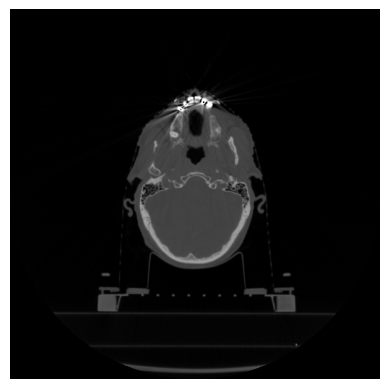

In [33]:
from readii.image_processing import displayImageSlice

displayImageSlice(orig_full_arr, 131, dispMin=-1000, dispMax=4000)

In [8]:
maximum = rand_full_arr.max()
binWidth = 25

highBound = maximum + 2 * binWidth
highBound

np.int16(31978)

In [67]:
np.arange(lowBound, highBound, binWidth)

/tmp/ipykernel_2318325/600092002.py:1: RuntimeWarning: overflow encountered in scalar subtract
  np.arange(lowBound, highBound, binWidth)


array([], dtype=int64)

In [66]:
old_image = sitk.ReadImage("data/procdata/TCIA_RADCURE/images/h4h_mit_RADCURE_GTVp/RADCURE-0006_0001/CT_77369565/CT.nii.gz")
old_arr = sitk.GetArrayFromImage(old_image)
old_arr.min()
old_arr.max()

np.arange(old_arr.min(), old_arr.max(), 25)

/tmp/ipykernel_2318325/2065715453.py:6: RuntimeWarning: overflow encountered in scalar subtract
  np.arange(old_arr.min(), old_arr.max(), 25)


array([], dtype=int64)

In [22]:
orig_full_arr[76,:,:]

array([[-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       ...,
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048]],
      shape=(512, 512), dtype=int16)

In [68]:
wl = 1500
ww = 7000
upper_g_level = wl + (ww / 2)
lower_g_level = wl - (ww / 2)

print(f"Upper gray level: {upper_g_level}")
print(f"Lower gray level: {lower_g_level}")

Upper gray level: 5000.0
Lower gray level: -2000.0


In [63]:
np.arange(lower_g_level, 
          upper_g_level, binWidth)

array([-3000., -2975., -2950., -2925., -2900., -2875., -2850., -2825.,
       -2800., -2775., -2750., -2725., -2700., -2675., -2650., -2625.,
       -2600., -2575., -2550., -2525., -2500., -2475., -2450., -2425.,
       -2400., -2375., -2350., -2325., -2300., -2275., -2250., -2225.,
       -2200., -2175., -2150., -2125., -2100., -2075., -2050., -2025.,
       -2000., -1975., -1950., -1925., -1900., -1875., -1850., -1825.,
       -1800., -1775., -1750., -1725., -1700., -1675., -1650., -1625.,
       -1600., -1575., -1550., -1525., -1500., -1475., -1450., -1425.,
       -1400., -1375., -1350., -1325., -1300., -1275., -1250., -1225.,
       -1200., -1175., -1150., -1125., -1100., -1075., -1050., -1025.,
       -1000.,  -975.,  -950.,  -925.,  -900.,  -875.,  -850.,  -825.,
        -800.,  -775.,  -750.,  -725.,  -700.,  -675.,  -650.,  -625.,
        -600.,  -575.,  -550.,  -525.,  -500.,  -475.,  -450.,  -425.,
        -400.,  -375.,  -350.,  -325.,  -300.,  -275.,  -250.,  -225.,
      

In [40]:
hn1_features = pd.read_csv("data/results/TCIA_RADCURE_window_test/features/pyradiomics/original_512_512_n/pyradiomics_h4h_all_images_features/randomized_full_features.csv")
hn1_features['original_firstorder_Maximum'].max()

np.float64(24984.0)

In [41]:
hn1_features['original_firstorder_Minimum'].min()

np.float64(-7717.0)